In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import mlflow

import matplotlib.pyplot as plt

In [9]:
# prod_in = pd.read_csv('C:\\Users\\jsingh\\Documents\\local_projects\\PC_projects\\QBI\\qcast\\results\\TC_examples_buildup\\Gas_Example_bounds_qi_forecast_2wells.csv', index_col=0)
prod_in = pd.read_csv('./Gas_Example_bounds_qi_forecast.csv', index_col=0)

In [10]:
prod_in.head()

,date,index,days_on,oil_actual_daily,oil_actual_monthly,oil_pred_daily,gas_actual_daily,gas_actual_monthly,gas_pred_daily,water_actual_daily,water_actual_monthly,water_pred_daily,included_oil,included_gas,included_water,peak_index,oil_pred_monthly,gas_pred_monthly,water_pred_monthly,well_name,ngl_actual_daily,ngl_actual_monthly,ngl_actual_cumulative,ngl_pred_daily,ngl_pred_monthly,ngl_pred_cumulative,oil_actual_cumulative,oil_pred_cumulative,gas_actual_cumulative,gas_pred_cumulative,water_actual_cumulative,water_pred_cumulative,boe6_actual_daily,boe6_actual_monthly,boe6_actual_cumulative,boe6_pred_daily,boe6_pred_monthly,boe6_pred_cumulative,boe20_actual_daily,boe20_actual_monthly,boe20_actual_cumulative,boe20_pred_daily,boe20_pred_monthly,boe20_pred_cumulative,oil_combined_monthly,gas_combined_monthly,water_combined_monthly,ngl_combined_monthly,boe6_combined_monthly,boe20_combined_monthly,batch_name,unique_id,timestamp
api,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3504925141,2018-02-01,1,28,18.571429,520.0,18.571429,0.000000,0.0,NaN,0.0,0.0,0,False,False,True,-14,520.000000,0.000000,0,N HAYS 2H-5X,0,0,0,0,0,0,520.0,520.000000,0.0,0.000000,0.0,0,18.571429,520.000000,520.000000,18.571429,520.000000,520.000000,18.571429,520.00,520.00,18.571429,520.000000,520.000000,520.0,0.0,0,0,520.000000,520.00,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59
3504925141,2018-03-01,2,31,343.935484,10662.0,343.935484,443.580645,13751.0,443.580645,0.0,0.0,0,False,False,False,-13,10662.000000,13751.000000,0,N HAYS 2H-5X,0,0,0,0,0,0,11182.0,11182.000000,13751.0,13751.000000,0.0,0,417.865591,12953.833333,13473.833333,417.865591,12953.833333,13473.833333,366.114516,11349.55,11869.55,366.114516,11349.550000,11869.550000,10662.0,13751.0,0,0,12953.833333,11349.55,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59
3504925141,2018-04-01,3,30,434.533333,13036.0,359.492601,2124.600000,63738.0,1965.801708,0.0,0.0,0,True,True,False,-12,10784.778041,58974.051247,0,N HAYS 2H-5X,0,0,0,0,0,0,24218.0,21966.778041,77489.0,72725.051247,0.0,0,788.633333,23659.000000,37132.833333,687.126219,20613.786582,34087.619916,540.763333,16222.90,28092.45,457.782687,13733.480604,25603.030604,13036.0,63738.0,0,0,23659.000000,16222.90,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59
3504925141,2018-05-01,4,31,227.806452,7062.0,244.537714,1993.903226,61811.0,1869.156942,0.0,0.0,0,True,True,False,-11,7580.669145,57943.865190,0,N HAYS 2H-5X,0,0,0,0,0,0,31280.0,29547.447186,139300.0,130668.916437,0.0,0,560.123656,17363.833333,54496.666667,556.063871,17237.980010,51325.599926,327.501613,10152.55,38245.00,337.995561,10477.862405,36080.893008,7062.0,61811.0,0,0,17363.833333,10152.55,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59
3504925141,2018-06-01,5,30,157.333333,4720.0,184.910133,1540.666667,46220.0,1783.519650,0.0,0.0,0,True,True,False,-10,5547.303997,53505.589489,0,N HAYS 2H-5X,0,0,0,0,0,0,36000.0,35094.751184,185520.0,184174.505925,0.0,0,414.111111,12423.333333,66920.000000,482.163408,14464.902245,65790.502171,234.366667,7031.00,45276.00,274.086116,8222.583472,44303.476480,4720.0,46220.0,0,0,12423.333333,7031.00,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59


In [11]:
prod_pred_avg = prod_in.groupby('index')[['oil_combined_monthly', 'oil_pred_monthly', 'gas_combined_monthly', 'gas_pred_monthly']].mean().reset_index()
prod_pred_avg.head()

,index,oil_combined_monthly,oil_pred_monthly,gas_combined_monthly,gas_pred_monthly
0,1,5371.705882,5371.705882,20703.735294,20744.792734
1,2,18403.676471,17080.171896,83862.970588,80834.157493
2,3,15141.500000,15548.009432,81885.176471,83960.293157
3,4,10981.176471,12555.552054,73334.705882,80218.682342
4,5,9964.323529,10507.140616,71212.205882,74644.103085


In [14]:
prod_pred_avg['oil_combined_monthly'].iloc[:12].sum()-prod_pred_avg['oil_pred_monthly'].iloc[:12].sum()

-3804.439039644698

In [3]:
prod_avg = prod_in.groupby('index')[['oil_combined_monthly', 'gas_combined_monthly']].mean().reset_index()
prod_avg.head()

,index,oil_combined_monthly,gas_combined_monthly
0,1,5371.705882,20703.735294
1,2,18403.676471,83862.970588
2,3,15141.500000,81885.176471
3,4,10981.176471,73334.705882
4,5,9964.323529,71212.205882


In [4]:
def hyperbolic_equation(x, a, b,c):
    return a/((1.0+b*c*x)**(1.0/b))

def exponential(x, a, b):
    return a*np.exp(-b*x)

def linear(x, a, b):
    return a*x+b

In [5]:
time_ = prod_avg['index']
rate_ = prod_avg['oil_combined_monthly']
t0_idx = np.argmax(rate_)

In [13]:
t0_idx

1

In [29]:
x_lin, y_lin = time_[0:2], rate_[0:2]
popt_lin, _ = curve_fit(linear, x_lin, y_lin)
a_lin, b_lin= popt_lin
x_line = np.arange(min(x_lin), max(x_lin), 1)
y_line_pred = linear(x_line, a_lin, b_lin)

c:\Users\prakash.pandey\Miniconda3\envs\mle-dev\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [53]:
x_exp, y_exp = time_[1:5], rate_[1:5]
popt_exp, _ = curve_fit(exponential, x_exp, y_exp)
a_exp, b_exp= popt_exp
x_expp = np.arange(min(x_exp), max(y_exp), 1)
y_expp_pred = exponential(x_exp, a_exp, b_exp)

In [57]:
x_hyp, y_hyp= time_[5:], rate_[5:]
popt_hyp, _ = curve_fit(hyperbolic_equation, x_hyp, y_hyp)
a_hyp, b_hyp, c_hyp= popt_hyp
x_hypp = np.arange(min(x_hyp), max(y_hyp), 1)
y_hyp_pred = hyperbolic_equation(x_hyp, a_hyp, b_hyp, c_hyp)

c:\Users\prakash.pandey\Miniconda3\envs\mle-dev\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [63]:
popt_hyp

array([nan, nan, nan])

In [36]:
import matplotlib.pyplot as pyplot

In [46]:
np.concatenate(y_line_pred, y_expp_pred, y_hyp_pred)

TypeError: 'Series' object cannot be interpreted as an integer

In [47]:
type(x_line), type(y_expp_pred)

(numpy.ndarray, pandas.core.series.Series)

In [56]:
y_line_pred.tolist()+y_expp_pred.tolist()+y_hyp_pred[:20].tolist()

C:\Users\prakash.pandey\AppData\Local\Temp\ipykernel_8888\3373873286.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_line_pred.tolist()+y_expp_pred.tolist()+y_hyp_pred[:20].tolist()


[5371.7058823529405,
 18428.869288193207,
 14758.667064226538,
 11819.404115706353,
 9465.510201052663,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

ValueError: x and y must be the same size

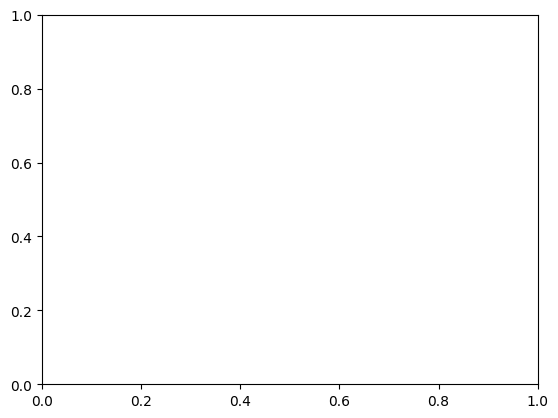

In [48]:
# pyplot.scatter(time_[:30], rate_[:30])
# pyplot.scatter(x_line, y_line_pred, '--', color='red')
# pyplot.scatter(x_expp, y_expp_pred, '--', color='blue')
pyplot.scatter(x_hypp, y_hyp_pred, '--', color='green')
pyplot.show()


In [1]:
import pandas as pd

In [2]:
summary_df = pd.read_csv('./Gas_Example_bounds_qi_summary.csv')

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
summary_df.head()

,segment,segment_final,single_segment_flag,forecast_override,forecast_type,gor_override,wor_override,t_start,t_start_date,t_seg_months,t_end,t_end_date,primary_phase,peak_month_oil,peak_month_gas,peak_month_water,oil_pre_forecast,gas_pre_forecast,water_pre_forecast,ngl_pre_forecast,qi_oil,b_oil,di_nom_oil,di_sec_oil,di_tan_oil,dlim_nom_oil,dlim_sec_oil,dlim_tan_oil,qi_gas,b_gas,di_nom_gas,di_sec_gas,di_tan_gas,dlim_nom_gas,dlim_sec_gas,dlim_tan_gas,qi_water,b_water,di_nom_water,di_sec_water,di_tan_water,dlim_nom_water,dlim_sec_water,dlim_tan_water,volatility_score,volatility_flag,convergence_oil,iterations_oil,error_oil,error_perc_oil,error_abs_oil,error_abs_perc_oil,convergence_gas,iterations_gas,error_gas,error_perc_gas,error_abs_gas,error_abs_perc_gas,convergence_water,iterations_water,error_water,error_perc_water,error_abs_water,error_abs_perc_water,api,well_name,operator,interval,latitude,longitude,latitude_bh,longitude_bh,lateral_length_ft,true_vertical_depth_ft,frac_proppant_lbs,frac_fluid_bbl,net_revenue_interest,working_interest,ip_year,q_lim_oil,q_lim_gas,q_lim_water,q_final_oil,q_final_gas,q_final_water,q_lim_ngl,q_final_ngl,oil_actual_cumulative,oil_eur,oil_remaining,gas_actual_cumulative,gas_eur,gas_remaining,water_actual_cumulative,water_eur,water_remaining,ngl_actual_cumulative,ngl_eur,ngl_remaining,boe6_actual_cumulative,boe6_eur,boe6_remaining,boe20_actual_cumulative,boe20_eur,boe20_remaining,error_flag,batch_name,unique_id,timestamp
0,single_segment_1,True,True,False,Single Well,False,False,1,2018-02-01,59,60,2023-01-01,GAS,2018-04-01,2018-04-01,2018-02-01,11182,13751,0,0,456.260000,0.957801,6.946948,0.880551,0.999038,0.072571,0.067755,0.07,2018.370000,1.484515,0.653007,0.366523,0.479522,0.072571,0.066600,0.07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354839,True,NON-CONVERGENCE,66,-557.174781,-0.006901,8836.612917,0.109451,CONVERGED,33,182906.308014,0.093176,499208.567125,0.254306,NON-CONVERGENCE,NaN,0,0,0,0,3504925141,N HAYS 2H-5X,OVINTIV,WOODFORD,34.680180,-97.540276,34.653276,-97.542468,9504,12277,14052555.0,339660.0,NaN,NaN,2018,3.898504,459.474373,NaN,0.295328,22.543077,0,NaN,NaN,91918,132276.920204,40358.920204,1976775,4.839698e+06,2.862923e+06,0,0,0,0,0,0,421380.500000,9.388933e+05,517512.816254,190756.75,374261.839019,183505.089019,False,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59
1,single_segment_1,True,True,False,Single Well,False,False,1,2018-02-01,59,60,2023-01-01,GAS,2018-04-01,2018-05-01,2018-02-01,11540,77579,0,0,768.494996,0.868874,8.776126,0.916247,0.999846,0.072571,0.067955,0.07,2513.501766,1.488256,0.541610,0.327805,0.418189,0.072571,0.066592,0.07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.129032,False,NON-CONVERGENCE,53,-456.475285,-0.004453,15681.433367,0.152969,NON-CONVERGENCE,57,80886.835963,0.033262,485160.751963,0.199504,NON-CONVERGENCE,NaN,0,0,0,0,3504925143,N HAYS 4H-5X,OVINTIV,WOODFORD,34.680180,-97.540146,34.652275,-97.538160,9989,12100,14978399.0,373888.0,NaN,NaN,2018,3.081861,651.233307,NaN,0.260154,31.607571,0,NaN,NaN,114054,150908.113767,36854.113767,2509412,6.521060e+06,4.011648e+06,0,0,0,0,0,0,532289.333333,1.237751e+06,705462.102975,239524.60,476961.110529,237436.510529,False,BATCH RUN,BATCH_RUN_jsingh_2023-10-09-T172159CDT,2023-10-09 17:21:59
2,single_segment_1,True,True,False,Single Well,False,False,1,2017-05-01,68,69,2023-01-01,GAS,2017-06-01,2017-06-01,2017-05-01,3828,20365,0,0,509.040000,0.985596,4.689276,0.826551,0.990807,0.072571,0.067693,0.07,3632.029007,1.600000,2.557913,0.638457,0.922534,0.072571,0.066354,0.07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027778,False,CONVERGED,25,-1137.010329,-0.009721,11686.144367,0.099916,CONVERGED,14,109803.703965,0.056707,391008.455855,0.201932,NON-CONVERGENCE,NaN,0,0,0,0,3504925089,TINA 2H-23X,OVINTIV,WOODFORD,34.694908,-97.593008,34.717409,-97.593358,7445,12938,11049470.0,397945.0,NaN,NaN,2017,7.412264,391.919188,NaN,0.539337,19.276023,0,NaN,NaN,122117,189668.590913,67551.590913,1978757,4.286726e+06,2.307969e+06,0,0,0,0,0,0,451909.8